# Having a look at Jarvis database

In [1]:
from jarvis.db.jsonutils import dumpjson
from jarvis.db.jsonutils import loadjson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.integrate import simps
from math import pi
from scipy import constants

In [2]:
from jarvis.db.figshare import data

In [6]:
dataset = data('dft_3d')

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [8]:
dataset[0].keys()

dict_keys(['jid', 'spg_number', 'spg_symbol', 'formula', 'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms', 'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor', 'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh', 'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz', 'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg', 'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij', 'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric', 'dfpt_piezo_max_dielectric_electronic', 'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode', 'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond', 'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality', 'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv', 'mbj_bandgap', 'hse_gap', 'reference', 'search'])

In [11]:
len(dataset)

75993

In [10]:
dataset[0]['bulk_modulus_kv']

'na'

In [7]:
snum_icsd_master = {}
for mat in dataset:
    d = {}
    id = mat['ICSD_number']
    d["GGA_gap"] = mat['Band_gap_GGA']
    d["HSE_gap"] = mat['Band_gap_HSE']
    d["GGA_opt"] = mat['Band_gap_GGA_optical']
    d["HSE_opt"] = mat['Band_gap_HSE_optical']
    d["Correction"] = d["HSE_gap"] - d["GGA_gap"]
    d["GGA_offset"] = d["GGA_opt"] - d["GGA_gap"]
    d["HSE_offset"] = d["HSE_opt"] - d["HSE_gap"]
    d['atoms'] = mat['atoms']
    snum_icsd_master[id] = d

In [8]:
dumpjson(snum_icsd_master, "snum_icsd_master.json")

In [22]:
just_gaps = {id:{'GGA_gap':snum_icsd_master[id]['GGA_gap'],'HSE_gap':snum_icsd_master[id]['HSE_gap']} for id in snum_icsd_master.keys()}

In [23]:
dumpjson(just_gaps,'Kim_10k_GGA_HSE_gaps.json')

In [ ]:
d = data('supercon_chem') #choose a name of dataset from above
# See available keys
print (d[0].keys())
# Dataset size
print(len(d))


In [4]:
#oqmd = data("oqmd_3d")
#print(oqmd.keys())

In [8]:
#d3 = data('cfid_3d') crashes server every time
#print(d3[0].keys())

In [5]:
d[0]

{'id': 1524, 'Tc': 0.0, 'formula': 'Tb1Th3.4Ru0.6B4'}

In [10]:
dims = ['0D-bulk',
 '1D-bulk',
 '2D-bulk',
 '3D-bulk',
 'intercalated ion',
 'intercalated molecule',
 'na']

In [11]:
counts = [0,0,0,0,0,0,0]

In [12]:
for mat in d:
    dim = mat['dimensionality']
    i = dims.index(dim)
    counts[i]+=1

In [13]:
dim_count = {dim:count for dim,count in zip(dims,counts)}

In [14]:
dim_count

{'0D-bulk': 1817,
 '1D-bulk': 1320,
 '2D-bulk': 4427,
 '3D-bulk': 36101,
 'intercalated ion': 31682,
 'intercalated molecule': 213,
 'na': 433}

In [15]:
SLMES = {}
jid_to_mpid = {}
jid_to_icsd = {}
opt_gaps = {}
hse_gaps = {}
mbj_gaps = {}
for mat in d:
    if mat['dimensionality']=='3D-bulk':
        jid = mat['jid']
        if mat['slme'] != 'na':
                SLMES[jid]=mat['slme']
        if mat['reference'] !='na':
            jid_to_mpid[jid] = mat['reference']
        if mat['icsd'] != 'na':
            jid_to_icsd[jid] = mat['icsd']
        if mat['hse_gap'] !='na':
            hse_gaps[jid] = mat['hse_gap']
        if mat['optb88vdw_bandgap']!='na':
            opt_gaps[jid] = mat['optb88vdw_bandgap']
        if mat['mbj_bandgap'] !='na':
            mbj_gaps[jid] = mat['mbj_bandgap'] 

In [16]:
len(jid_to_mpid),len(jid_to_icsd),len(opt_gaps),len(hse_gaps),len(mbj_gaps),len(SLMES)

(36101, 36101, 36101, 1, 8827, 3248)

In [17]:
mpid_to_jid = {v:k for k,v in jid_to_mpid.items()}
icsd_to_jid = {v:k for k,v in jid_to_icsd.items()}

In [69]:
l_df = pd.read_csv('labels.csv')

In [71]:
ft_labels = l_df['Identifier']

In [72]:
ft_Js = [mpid_to_jid[mpid] for mpid in ft_labels if mpid in mpid_to_jid]

In [18]:
len(set(jid_to_icsd.keys()).intersection(set(mbj_gaps.keys())))

8827

In [19]:
mbj_gaps[mpid_to_jid['mp-2534']]

1.321

In [20]:
fab_gaps = loadjson('fab_gaps.json')

In [21]:
len(set(fab_gaps.keys()).intersection(mpid_to_jid.keys()))

168

In [22]:
rows = []
for mpid in fab_gaps:
    if mpid in mpid_to_jid:
        jid = mpid_to_jid[mpid]
        if jid in mbj_gaps:
            j_gap = mbj_gaps[jid]
            f_gap = fab_gaps[mpid]
            rows.append([j_gap,f_gap])
jf_gap_array = np.array(rows)

In [23]:
def MAE(targ, pred):
    mae = 0
    for t,p in zip(targ,pred):
        mae += abs(t-p)
    mae = mae/len(targ)
    return mae

In [24]:
xs = np.linspace(0,30,3)

In [25]:
snums = loadjson('../hybrid_gaps/clean_snums.json')

In [26]:
len(set(snums.keys()).intersection(jid_to_icsd.values()))

711

In [27]:
rows = []
for icsd in snums:
    if icsd in icsd_to_jid:
        jid = icsd_to_jid[icsd]
        if jid in mbj_gaps:
            j_gap = mbj_gaps[jid]
            s_gap = snums[icsd]['HSE_gap']
            rows.append([j_gap,s_gap])
js_gap_array = np.array(rows)

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5),sharex=True)
fig.suptitle('All available band-gap data')
fig.supxlabel('JARVIS mBJ band-gap / eV')
axs[0].set_ylabel(r'Fabini $\Delta$-sol band-gap / eV')
axs[1].set_ylabel('Kim HSE06 band-gap / eV')
axs[0].plot(xs,xs,'--k')
axs[1].plot(xs,xs,'--k')
axs[0].scatter(jf_gap_array[:,0],jf_gap_array[:,1])
axs[1].scatter(js_gap_array[:,0],js_gap_array[:,1],marker='x')

In [29]:
MAE(jf_gap_array[:,0],jf_gap_array[:,1])

0.44847611111111113

In [30]:
MAE(js_gap_array[:,0],js_gap_array[:,1])

0.8234721366120216

Effectively removing the two outliers by limiting the range of the plots:

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5),sharex=True)
fig.suptitle('Crazy outliers from each removed')
fig.supxlabel('JARVIS mBJ band-gap / eV')
axs[0].set_ylabel(r'Fabini $\Delta$-sol band-gap / eV')
axs[1].set_ylabel('Kim HSE06 band-gap / eV')
axs[0].plot(xs,xs,'--k')
axs[1].plot(xs,xs,'--k')
axs[0].scatter(jf_gap_array[:,0],jf_gap_array[:,1],marker='x')
axs[1].scatter(js_gap_array[:,0],js_gap_array[:,1],marker='x')
axs[0].set_xlim(0,12)
axs[1].set_xlim(0,12)
axs[0].set_ylim(0,12)
axs[1].set_ylim(0,12)

(0.0, 12.0)

In [32]:
expt_data = loadjson('expt_band_gaps.json')

In [33]:
expt_data[0].keys()

dict_keys(['reference', 'icsd_id', 'structure', 'composition', 'comments', 'bandgap type', 'exp method', 'bandgap value (eV)', 'space group', 'temp (K)'])

In [34]:
expt_gaps = {}
for i in expt_data:
    expt_gaps[i['icsd_id']]=i['bandgap value (eV)']

In [35]:
expt_data[7]

{'reference': ['1', '1', '1'],
 'icsd_id': 674426,
 'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': None,
  'lattice': {'matrix': [[4.267, 0.0, 2.612783946e-16],
    [6.861859346e-16, 4.267, 2.612783946e-16],
    [0.0, 0.0, 4.267]],
   'a': 4.267,
   'b': 4.267,
   'c': 4.267,
   'alpha': 90.0,
   'beta': 90.0,
   'gamma': 90.0,
   'volume': 77.690502163},
  'sites': [{'species': [{'element': 'Cu',
      'oxidation_state': 0.0,
      'occu': 1.0}],
    'abc': [0.0, 0.5, 0.5],
    'xyz': [3.430929673e-16, 2.1335, 2.1335],
    'label': 'Cu0+',
    'properties': {}},
   {'species': [{'element': 'Cu', 'oxidation_state': 0.0, 'occu': 1.0}],
    'abc': [0.5, 0.5, 0.0],
    'xyz': [2.1335, 2.1335, 2.612783946e-16],
    'label': 'Cu0+',
    'properties': {}},
   {'species': [{'element': 'Cu', 'oxidation_state': 0.0, 'occu': 1.0}],
    'abc': [0.5, 0.0, 0.5],
    'xyz': [2.1335, 0.0, 2.1335],
    'label': 'Cu0+',
    'properties': {}},
   {'species': [{'

In [36]:
clean_gaps = {}
for k,v in expt_gaps.items():
    k_new = str(k)
    if type(v) == list:
        v_new = [float(i) for i in v]
    else:
        v_new = float(v)
    clean_gaps[k_new]=v_new

In [37]:
len(set(clean_gaps.keys()).intersection(snums.keys()))

356

In [38]:
len(set(clean_gaps.keys()).intersection(jid_to_icsd.values()))

40

In [39]:
len(set(clean_gaps.keys()).intersection(snum_icsds))

366

In [40]:
len(expt_gaps),len(expt_data)

(1886, 2808)

In [41]:
j_rows = []
s_rows = []
for icsd in clean_gaps:
    if icsd in icsd_to_jid:
        jid = icsd_to_jid[icsd]
        if jid in mbj_gaps:
            j_rows.append([np.mean(clean_gaps[icsd]),mbj_gaps[jid]])
    if icsd in snums:
        s_rows.append([np.mean(clean_gaps[icsd]),snums[icsd]['HSE_gap']])
es_array = np.array(s_rows)
ej_array = np.array(j_rows)
        

In [42]:
def show_MAEs(preds_array):
    mae = round(MAE(preds_array[:,0],preds_array[:,1]),3)
    mape = round(mae/np.mean(preds_array[:,0])*100,1)
    message = f"MAE of {mae}, approximate MAPE of {mape}%"
    print(message)

In [43]:
icsd_to_mpid = loadjson('../hybrid_gaps/icsd_to_mp.json')

In [44]:
e_mpids = {i:icsd_to_mpid[i] for i in clean_gaps if i in icsd_to_mpid}

In [45]:
len(e_mpids)

1058

In [46]:
len(set(e_mpids.values()).intersection(fab_gaps.keys()))

111

In [47]:
mbj_mpids = [jid_to_mpid[i] for i in set(jid_to_mpid.keys()).intersection(mbj_gaps.keys())]

In [48]:
len(mbj_mpids)

8827

In [49]:
len(set(e_mpids.values()).intersection(mbj_mpids))

175

In [50]:
expt_mpid_gaps = {}
for icsd,mpid in e_mpids.items():
    expt_mpid_gaps[mpid]=clean_gaps[icsd]

In [51]:
len(expt_mpid_gaps)

1009

In [52]:
rows1 = []
rows2 = []
ef_dict = {}
count =0
for mpid in expt_mpid_gaps:
    if mpid in mpid_to_jid:
        jid = mpid_to_jid[mpid]
        if jid in mbj_gaps:
            j_gap = mbj_gaps[jid]
            rows1.append([np.mean(expt_mpid_gaps[mpid]),j_gap])
    if mpid in fab_gaps:
        f_gap = fab_gaps[mpid]
        rows2.append([np.mean(expt_mpid_gaps[mpid]),f_gap])
        
ej2_array = np.array(rows1)
ef_array = np.array(rows2)

In [53]:
np.shape(ef_array)

(111, 2)

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5),sharex=True)
fig.suptitle('Calculated vs experiment band-gaps - though dodgy expt data')
fig.supxlabel('Experiment band-gap / eV')
axs[0].set_ylabel('JARVIS mBJ band-gap / eV')
axs[1].set_ylabel('Kim HSE06 band-gap / eV')
axs[2].set_ylabel(r'Fabini $\Delta$-sol band-gap / eV')
axs[0].plot(xs,xs,'--k')
axs[1].plot(xs,xs,'--k')
axs[2].plot(xs,xs,'--k')
axs[0].scatter(ej2_array[:,0],ej2_array[:,1],marker='x')
axs[1].scatter(es_array[:,0],es_array[:,1],marker='x')
axs[2].scatter(ef_array[:,0],ef_array[:,1],marker='x')
lim = 15#np.max(es_array)
axs[0].set_xlim(0,lim)
axs[0].set_ylim(0,lim)
axs[1].set_ylim(0,lim)
axs[2].set_ylim(0,lim)

(0.0, 15.0)

In [55]:
show_MAEs(ej_array) #mbJ dataset using ICSDs to cross-reference

MAE of 0.5, approximate MAPE of 22.4%


In [56]:
show_MAEs(ej2_array) #mbJ dataset using MPIDs to cross-reference

MAE of 0.657, approximate MAPE of 29.8%


In [57]:
show_MAEs(es_array)

MAE of 0.49, approximate MAPE of 23.4%


In [58]:
show_MAEs(ef_array)

MAE of 0.32, approximate MAPE of 20.0%


In [59]:
SLME_preds = pd.read_csv('choudhary_SLME.csv')

In [60]:
SLME_preds

,JARVIS-ID,Formula,Dir.gap (eV),Indir. gap (eV),Eff (%),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,JVASP-8708,Au1 Sn1 Ho1,0.9845,0.1085,0.000000,NaN,NaN,NaN
1,JVASP-8713,Sc1 Ni1 Bi1,1.0076,0.2143,0.144514,NaN,NaN,NaN
2,JVASP-8714,Y1 Ni1 Bi1,0.8857,0.2359,0.428130,NaN,NaN,NaN
3,JVASP-8718,C1 Th1 N1,2.2448,1.8242,13.676463,NaN,NaN,NaN
4,JVASP-8728,Sn1 Pt1 Ti1,1.2917,0.9195,20.350016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5092,JVASP-50964,I6 Sr2 Ba1,4.8694,4.7810,0.000000,NaN,NaN,NaN
5093,JVASP-50971,Yb1 O3 Ti1,2.8513,2.8513,6.393061,NaN,NaN,NaN
5094,JVASP-52196,Li1 Ag1 F2,3.9514,3.9436,0.043062,NaN,NaN,NaN
5095,JVASP-52203,Na3 Bi1 O4,1.7155,1.6745,28.063509,NaN,NaN,NaN


In [61]:
SLME_preds.columns

Index(['JARVIS-ID', 'Formula', 'Dir.gap (eV)', 'Indir. gap (eV)', 'Eff (%)',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [62]:
jarvs = list(SLME_preds['JARVIS-ID'])

In [63]:
dir_gaps = {k:v for k,v in zip(jarvs,SLME_preds['Dir.gap (eV)'])}
indir_gaps = {k:v for k,v in zip(jarvs,SLME_preds['Indir. gap (eV)'])}

In [64]:
tb_gaps = {}
for jid in dir_gaps:
    dir = dir_gaps[jid]
    indir = indir_gaps[jid]
    lower = min(dir,indir)
    tb_gaps[jid] = lower

In [75]:
rows1 = []
rows2 = []
s_Js = []
f_Js = []
for jid,gap in tb_gaps.items():
    if jid in jid_to_icsd:
        icsd = jid_to_icsd[jid]
        if icsd in snums:
            s_gap = snums[icsd]['HSE_gap']
            rows1.append([gap,s_gap])
            s_Js.append(jid)
    if jid in jid_to_mpid:
        mpid = jid_to_mpid[jid]
        if mpid in fab_gaps:
            f_gap = fab_gaps[mpid]
            rows2.append([gap,f_gap])
            f_Js.append(jid)
t_s_gaps = np.array(rows1)
t_f_gaps = np.array(rows2)
            

In [74]:
len(set(jarvs).intersection(ft_Js))

757

In [76]:
len(s_Js)

250

In [77]:
len(f_Js)

107

In [78]:
len(set(s_Js).intersection(f_Js))

27

In [80]:
len(set(s_Js).intersection(ft_Js))

188

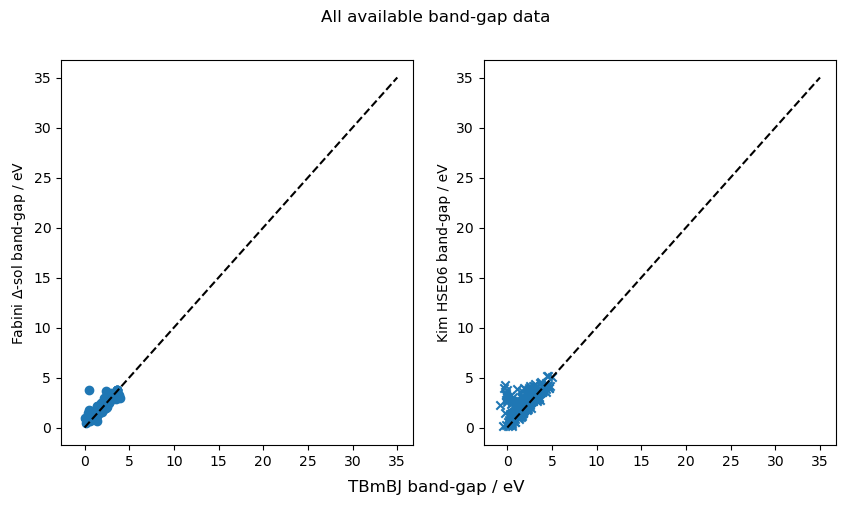

In [273]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5),sharex=True)
fig.suptitle('All available band-gap data')
fig.supxlabel('TBmBJ band-gap / eV')
axs[0].set_ylabel(r'Fabini $\Delta$-sol band-gap / eV')
axs[1].set_ylabel('Kim HSE06 band-gap / eV')
axs[0].plot(xs,xs,'--k')
axs[1].plot(xs,xs,'--k')
axs[0].scatter(t_f_gaps[:,0],t_f_gaps[:,1])
axs[1].scatter(t_s_gaps[:,0],t_s_gaps[:,1],marker='x')

In [219]:
len(set(jarvs).intersection(jid_to_mpid))

1721

In [231]:
len(set(jarvs).intersection(jid_to_icsd))

1721

In [222]:
len(set(jarvs).intersection(SLMES))


1432

In [239]:
tbmbj_etas = {k:v for k,v in zip(jarvs,effs)}

In [223]:
effs = SLME_preds['Eff (%)']

In [225]:
rows = []
for jid,eff in zip(jarvs,effs):
    if jid in SLMES:
        rows.append([eff, SLMES[jid]])
jj_array = np.array(rows)

In [240]:
fab_etas = loadjson('fab_SLMEs.json')

In [258]:
rows = []
t_f_dict = {}
count=0
for mpid in fab_etas:
    if mpid in mpid_to_jid:
        jid = mpid_to_jid[mpid]
        if jid in tbmbj_etas:
            j_eta = tbmbj_etas[jid]
            rows.append([j_eta,fab_etas[mpid]])
            t_f_dict[mpid] = count
            count+=1
t_f = np.array(rows)

In [252]:
xs=np.linspace(0,35,2)

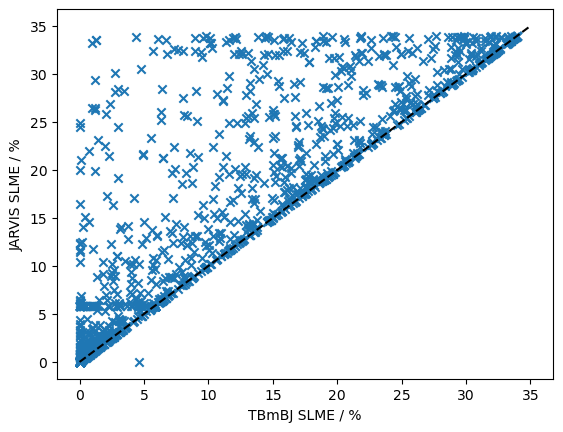

In [253]:
plt.scatter(jj_array[:,0],jj_array[:,1],marker='x')
plt.xlabel('TBmBJ SLME / %')
plt.ylabel('JARVIS SLME / %')
plt.plot(xs,xs,'--k')

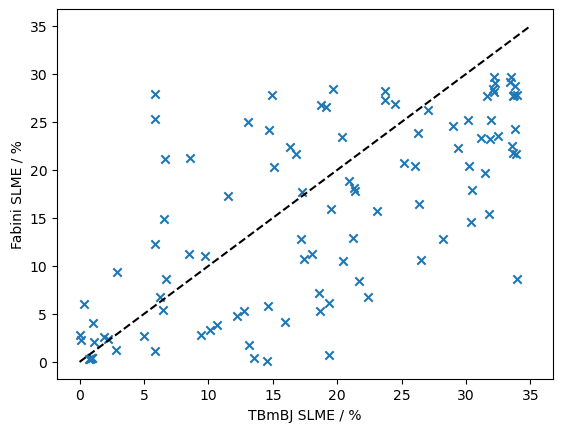

In [254]:
plt.scatter(t_f[:,0],t_f[:,1],marker='x')
plt.xlabel('TBmBJ SLME / %')
plt.ylabel('Fabini SLME / %')
plt.plot(xs,xs,'--k')

In [261]:
MAE(t_f[:,0],t_f[:,1])

7.205889102766989

In [274]:
MAE(t_f[:,0],t_f[:,1])/np.mean(t_f[:,1])

0.4700714280454416

In [255]:
mpid_to_jid['mp-2534']

'JVASP-1174'

In [256]:
SLME_preds[SLME_preds['JARVIS-ID']=='JVASP-1174']

,JARVIS-ID,Formula,Dir.gap (eV),Indir. gap (eV),Eff (%),Unnamed: 5,Unnamed: 6,Unnamed: 7
2591,JVASP-1174,As1 Ga1,1.3207,1.3207,33.728398,NaN,NaN,NaN


In [257]:
def rank(pred_array,id_dict):
    pred = {}
    true = {}
    for id in id_dict:
        index = id_dict[id]
        true[id] = pred_array[index,0]
        pred[id] = pred_array[index,1]
    s_trues = {k: v for k, v in sorted(true.items(), key=lambda item: item[1], reverse = True)}
    s_preds = {k: v for k, v in sorted(pred.items(), key=lambda item: item[1], reverse = True)}
    rank_dict = {}
    diff_dict = {}
    for id in true:
        pred_rank = list(s_preds.keys()).index(id)
        true_rank = list(s_trues.keys()).index(id)
        rank_dict[id] = pred_rank - true_rank
        diff_dict[id] = pred[id] - true[id]
    s_rank_dict = {k: v for k, v in sorted(rank_dict.items(), key=lambda item: item[1], reverse = True)}
    s_diff_dict = {k: v for k, v in sorted(diff_dict.items(), key=lambda item: item[1], reverse = True)}
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle("Differences in raw numbers and in rankings")
    axs[0].hist(s_diff_dict.values())
    axs[0].set_xlabel('Raw differences')
    axs[1].hist(s_rank_dict.values())
    axs[1].set_xlabel('Differences in ranks')
    return s_diff_dict, s_rank_dict

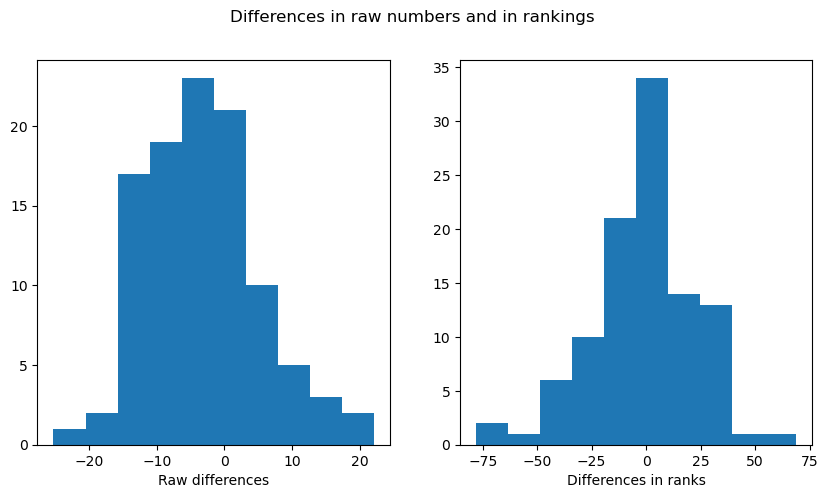

In [260]:
tf_diff_dict, tf_rank_dict = rank(t_f,t_f_dict)

In [262]:
master_tf = {'raw': tf_diff_dict,'rank': tf_rank_dict}

In [264]:
dumpjson(master_tf,'TBmBJ_vs_fab.json')